In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Load the Data

In [3]:
#we define col names as there are no col names in the dataset file
index= ["engine", "cycle"]
setting = [f"op_setting_{i}" for i in range(1, 4)]
sensor = [
    "Fan inlet temperature (◦R)",
    "LPC outlet temperature (◦R)",
    "HPC outlet temperature (◦R)",
    "LPT outlet temperature (◦R)",
    "Fan inlet Pressure (psia)",
    "Bypass-duct pressure (psia)",
    "HPC outlet pressure (psia)",
    "Physical fan speed (rpm)",
    "Physical core speed (rpm)",
    "Engine pressure ratio (P50/P2)",
    "HPC outlet Static pressure (psia)",
    "Ratio of fuel flow to Ps30 (pps/psia)",
    "Corrected fan speed (rpm)",
    "Corrected core speed (rpm)",
    "Bypass Ratio",
    "Burner fuel-air ratio",
    "Bleed Enthalpy",
    "Required fan speed",
    "Required fan conversion speed",
    "High-pressure turbines Cool air flow",
    "Low-pressure turbines Cool air flow",
]
col_names = index + setting + sensor 
train = pd.read_csv("../../data/raw/train_FD001.txt",sep="\s+", header=None, names = col_names) #separate by whitespace, the + is for one or more spaces
test  = pd.read_csv("../../data/raw/test_FD001.txt",sep="\s+", header=None, names = col_names)
rul = pd.read_csv("../../data/raw/RUL_FD001.txt", sep="\s+", header=None, names=['RUL'])


<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\halah\AppData\Local\Temp\ipykernel_10988\3751112546.py:28: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv("../../data/raw/train_FD001.txt",sep="\s+", header=None, names = col_names) #separate by whitespace, the + is for one or more spaces
C:\Users\halah\AppData\Local\Temp\ipykernel_10988\3751112546.py:29: SyntaxWarning: invalid escape sequence '\s'
  test  = pd.read_csv("../../data/raw/test_FD001.txt",sep="\s+", header=None, names = col_names)
C:\Users\halah\AppData\Local\Temp\ipykernel_10988\3751112546.py:30: SyntaxWarning: invalid escape sequence '\s'
  rul = pd.read_csv("../../data/raw/RUL_FD001.txt", sep="\s+", header=None, names=['RUL'])


In [4]:
train.head()

,engine,cycle,op_setting_1,op_setting_2,op_setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),...,Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
test.head()

,engine,cycle,op_setting_1,op_setting_2,op_setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),...,Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   engine                                 20631 non-null  int64  
 1   cycle                                  20631 non-null  int64  
 2   op_setting_1                           20631 non-null  float64
 3   op_setting_2                           20631 non-null  float64
 4   op_setting_3                           20631 non-null  float64
 5   Fan inlet temperature (◦R)             20631 non-null  float64
 6   LPC outlet temperature (◦R)            20631 non-null  float64
 7   HPC outlet temperature (◦R)            20631 non-null  float64
 8   LPT outlet temperature (◦R)            20631 non-null  float64
 9   Fan inlet Pressure (psia)              20631 non-null  float64
 10  Bypass-duct pressure (psia)            20631 non-null  float64
 11  HP

In [8]:
train.shape

(20631, 26)

In [9]:
test.shape

(13096, 26)

In [10]:
rul.shape

(100, 1)

In [11]:
train.isna().sum()

engine                                   0
cycle                                    0
op_setting_1                             0
op_setting_2                             0
op_setting_3                             0
Fan inlet temperature (◦R)               0
LPC outlet temperature (◦R)              0
HPC outlet temperature (◦R)              0
LPT outlet temperature (◦R)              0
Fan inlet Pressure (psia)                0
Bypass-duct pressure (psia)              0
HPC outlet pressure (psia)               0
Physical fan speed (rpm)                 0
Physical core speed (rpm)                0
Engine pressure ratio (P50/P2)           0
HPC outlet Static pressure (psia)        0
Ratio of fuel flow to Ps30 (pps/psia)    0
Corrected fan speed (rpm)                0
Corrected core speed (rpm)               0
Bypass Ratio                             0
Burner fuel-air ratio                    0
Bleed Enthalpy                           0
Required fan speed                       0
Required fa

In [12]:
test.isna().sum()

engine                                   0
cycle                                    0
op_setting_1                             0
op_setting_2                             0
op_setting_3                             0
Fan inlet temperature (◦R)               0
LPC outlet temperature (◦R)              0
HPC outlet temperature (◦R)              0
LPT outlet temperature (◦R)              0
Fan inlet Pressure (psia)                0
Bypass-duct pressure (psia)              0
HPC outlet pressure (psia)               0
Physical fan speed (rpm)                 0
Physical core speed (rpm)                0
Engine pressure ratio (P50/P2)           0
HPC outlet Static pressure (psia)        0
Ratio of fuel flow to Ps30 (pps/psia)    0
Corrected fan speed (rpm)                0
Corrected core speed (rpm)               0
Bypass Ratio                             0
Burner fuel-air ratio                    0
Bleed Enthalpy                           0
Required fan speed                       0
Required fa

In [13]:
train.duplicated().sum()

np.int64(0)

In [14]:
test.duplicated().sum()

np.int64(0)

In [15]:
print("Number of engines in train dataset:", train['engine'].nunique())

Number of engines in train dataset: 100


In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Fan inlet temperature (◦R),20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
LPC outlet temperature (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
HPC outlet temperature (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
LPT outlet temperature (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Fan inlet Pressure (psia),20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


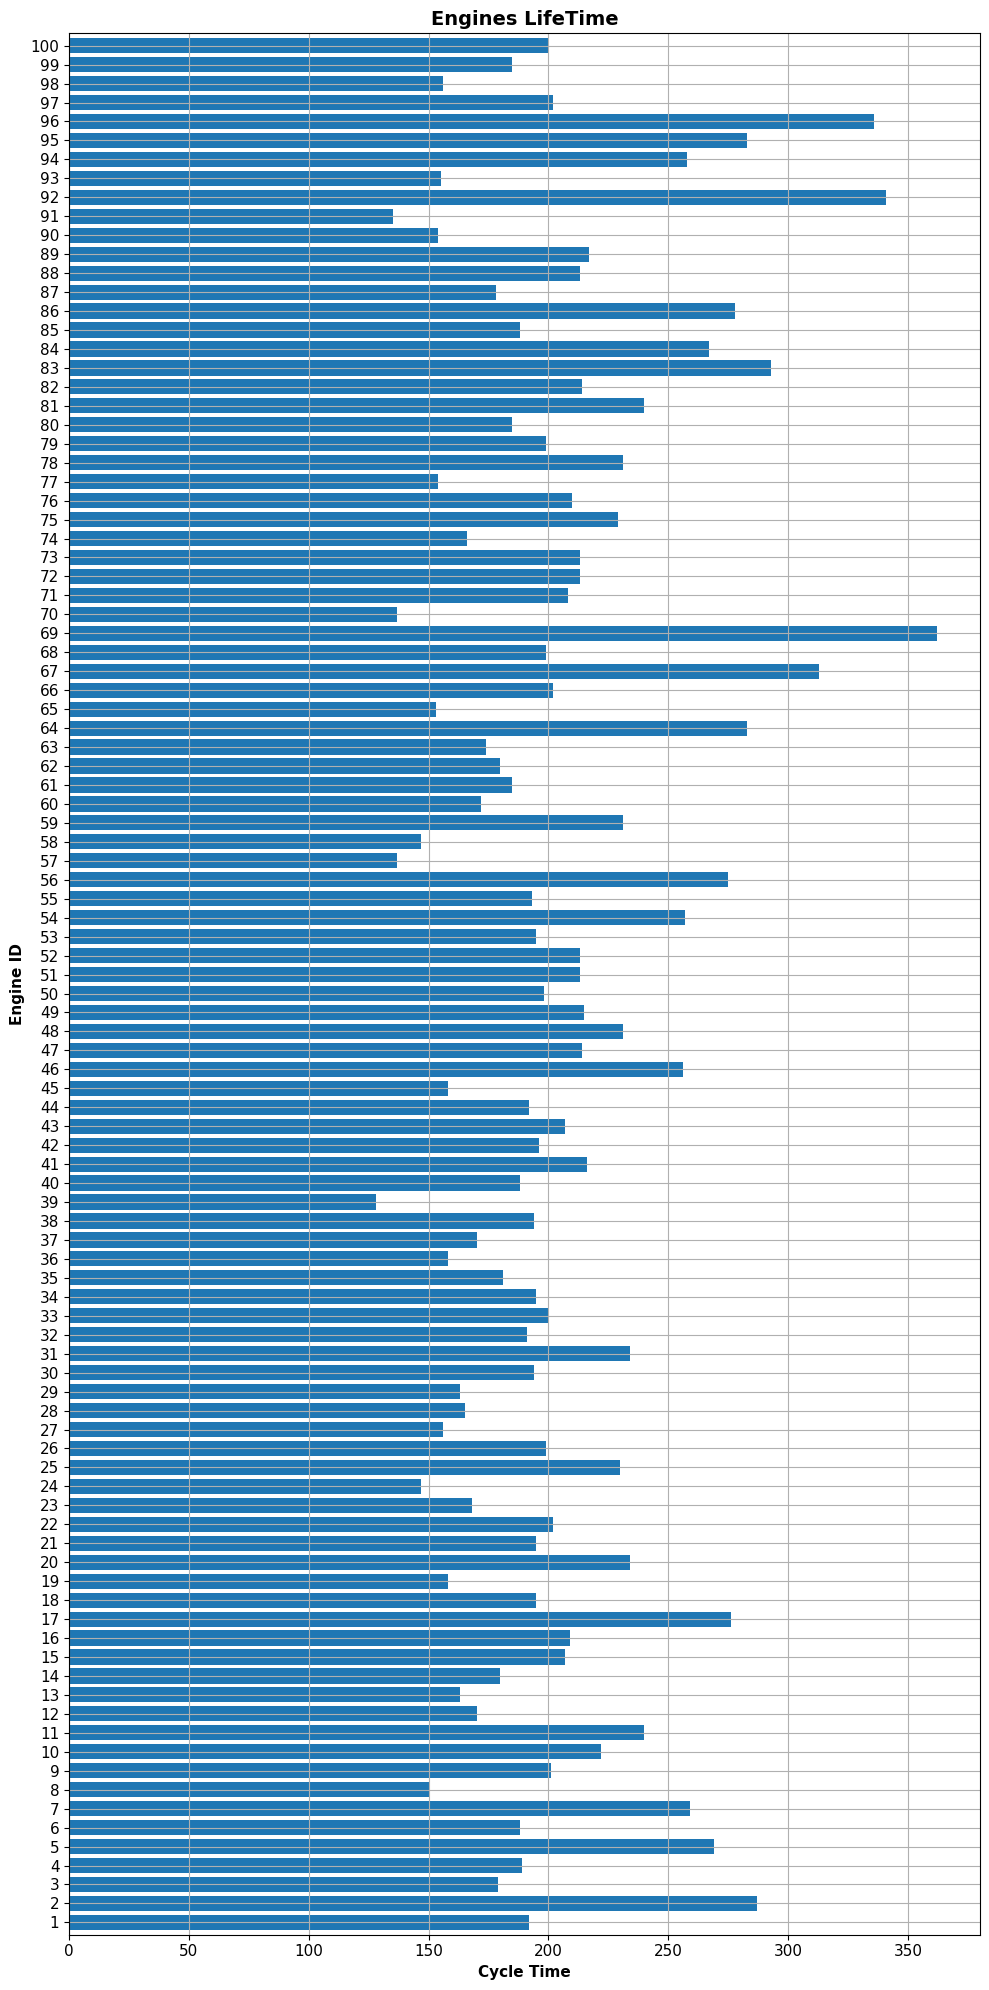

In [31]:

plt.figure(figsize=(10,20))
ax=train.groupby('engine')['cycle'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title('Engines LifeTime',fontweight='bold',size=14)
plt.xlabel('Cycle Time',fontweight='bold',size=11)
plt.xticks(size=11)
plt.ylabel('Engine ID',fontweight='bold',size=11)
plt.yticks(size=11)
plt.grid()
plt.tight_layout()
plt.show()

In [17]:
#From the description of the dataframe we see some columns who seem to be constant (same min and max values) these wont help us so it is safe to drop them
constant_cols = [col for col in train.columns if train[col].nunique() == 1]

print("Columns with constant values:" , constant_cols)
train.drop(constant_cols, axis=1, inplace=True, errors='ignore')
test.drop(constant_cols, axis=1, inplace=True, errors='ignore')

Columns with constant values: ['op_setting_3', 'Fan inlet temperature (◦R)', 'Fan inlet Pressure (psia)', 'Engine pressure ratio (P50/P2)', 'Burner fuel-air ratio', 'Required fan speed', 'Required fan conversion speed']


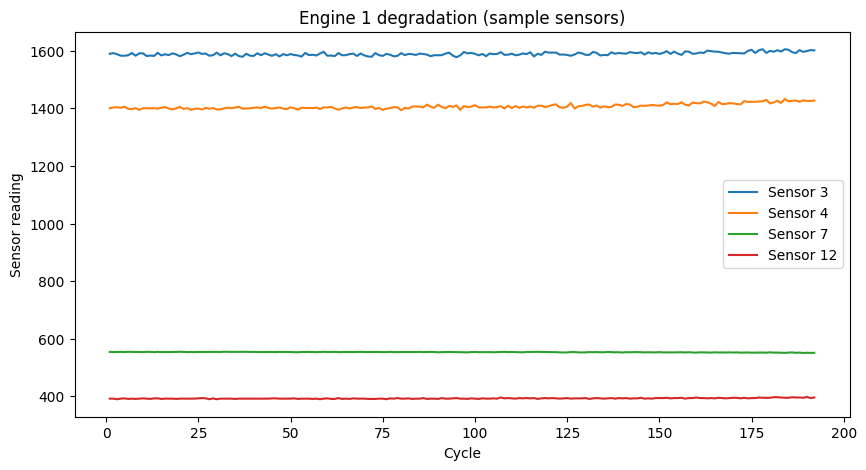

In [18]:
engine1 = train[train['engine']==1]
plt.figure(figsize=(10,5))
plt.plot(engine1['cycle'], engine1['HPC outlet temperature (◦R)'], label='Sensor 3')
plt.plot(engine1['cycle'], engine1['LPT outlet temperature (◦R)'], label='Sensor 4')
plt.plot(engine1['cycle'], engine1['HPC outlet pressure (psia)'], label='Sensor 7')
plt.plot(engine1['cycle'], engine1['Bleed Enthalpy'], label='Sensor 12')
plt.xlabel("Cycle")
plt.ylabel("Sensor reading")
plt.title("Engine 1 degradation (sample sensors)")
plt.legend()
plt.show()

In [19]:
train.shape

(20631, 19)

In [20]:
test.shape

(13096, 19)

In [21]:

#identifies max cycle for each engine
train['max_cycle'] = train.groupby('engine')['cycle'].transform('max')
#calculates RUL to each cycle 
train['RUL'] = train['max_cycle'] - train['cycle']
#remove max_cycle col as it is no longer needed
train = train.drop('max_cycle', axis=1)
train

,engine,cycle,op_setting_1,op_setting_2,LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Bleed Enthalpy,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


Prepare the test set with RUL labels

In [22]:
#load true RUL values from RUL_FD001.txt
rul_values= rul['RUL'].values

#find the last cycle (max_cycle) for each engine in the test set
test['max_cycle'] = test.groupby('engine')['cycle'].transform('max')

#we create a new dataframe test_rul to facilitate the merge operation
#it contains each engine, its max_cycle and the corresponding true RUL value
test_rul = pd.DataFrame({"engine": test['engine'].unique(), "max_cycle": test.groupby('engine')['cycle'].max().values, "true_RUL": rul_values})

#merge this mapping back to the test set
test= test.merge(test_rul, on=['engine', 'max_cycle'], how='left')
test['RUL'] = test['true_RUL'] + (test['max_cycle'] - test['cycle']) #this computation gives the RUL for each cycle in the test set (decreases linearly)
test= test.drop(columns=['max_cycle', 'true_RUL'])
test


,engine,cycle,op_setting_1,op_setting_2,LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Bleed Enthalpy,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,21


## Exploratory Plots

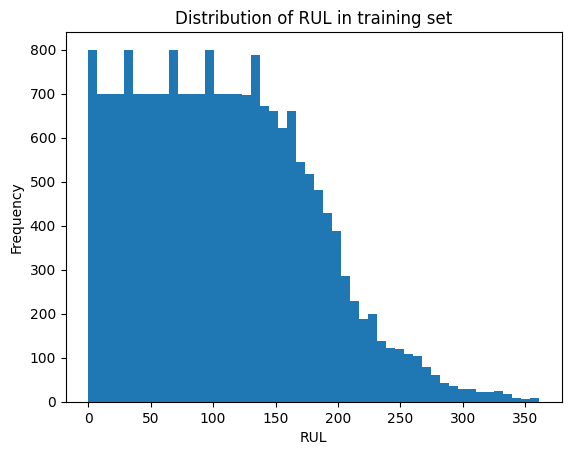

In [23]:
plt.hist(train['RUL'], bins=50)
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.title("Distribution of RUL in training set")
plt.show()

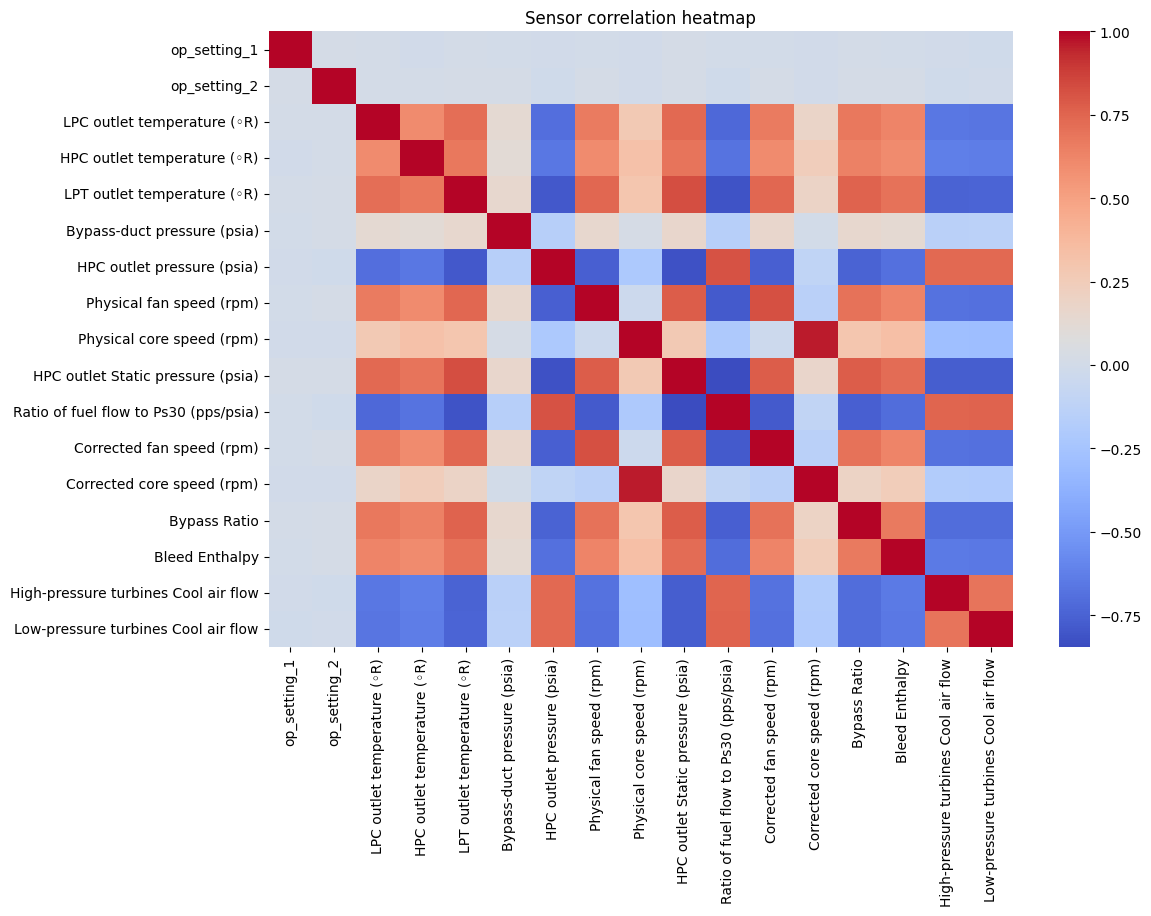

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(train.drop(columns=['engine','cycle','RUL']).corr(), cmap="coolwarm")
plt.title("Sensor correlation heatmap")
plt.show()